# Basics on Python and Quantum Computing
###### By: J. A. Orduz-Ducuara

## Quantum Hello world with data!

We import the libraries or modules

In [1]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

We introduce a line to draw the graphs in the nb

In [2]:
%matplotlib inline

Import pandas and data in the csv format.

In [3]:
df_sgnl=pd.read_csv("data/signal.csv")
df_bckgrnd=pd.read_csv("data/background.csv")
type(df_sgnl)
type(df_bckgrnd)

pandas.core.frame.DataFrame

Move pennylane.numpy.tensor.tensor to numpy array

In [4]:
n_samples=200
np_Array_signal = df_sgnl[0:n_samples].to_numpy()
np_Array_background = df_bckgrnd[0:n_samples].to_numpy()

type(np_Array_signal)
type(np_Array_background)

numpy.ndarray

Print out t_0_pT column as Pandas Series

In [5]:
A=np_Array_signal[:,[1,2]]
B=np_Array_signal[:,[1,3]]
C=np_Array_background[:,[1,2]]
D=np_Array_background[:,[1,3]]

In [6]:
#print(D)
#print(type(D))
print(D.dtype)

float64


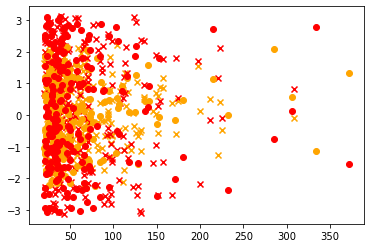

In [7]:
plt.scatter(A[:,0], A[:,1], marker='x',color = "orange")
plt.scatter(B[:,0], B[:,1], marker='x',color = "red")
plt.scatter(C[:,0], C[:,1], marker='o',color = "orange")
plt.scatter(D[:,0], D[:,1], marker='o',color = "red")
plt.show()

We assign -1 to yellow, and 1 to blue points.

In [8]:
feature = np.concatenate([A, B, C,D], axis=0)
orangePoints = np.ones(n_samples // 2)
bluePoints   = orangePoints
label = np.concatenate([-orangePoints, bluePoints], axis=0)
data = list(zip(feature, label))

Pennylane requires initialize the services.
```python
default.qubit
```
is the pennylane simulator.
```python
wires = 2
```
are the number of qubits.

In [9]:
dev = qml.device("default.qubit", wires = 2)

And we create a quantum node or node,
```python
@qml.qnode(dev)
```
is to create a node, where we associate the service and the model to execute our model.

We will introduce next lines to shift classical to quantum model:
```python
    qml.RX(x[0]*w[2], wires = 0)
```
where ```qml``` is the way to call quantum machine learing with pennylane,
```RX``` is the 
$$R_x(\theta) = e^{-i \frac{\theta X}{2}}=\cos\frac{\theta}{2}+i \sin\frac{\theta}{2}$$ 
gate, this contains the data embedded into the angle, we parameterized the data in the angle values. $x$ is the label to Pauli matrix, $X=\sigma_x.$
Regarding last parametrization, the cosine and sine functions are 
```python 
x[0]w[2]
```
depending, 
where ```x[0]``` is a variable and ```w[2]``` is a parameter to change the period.

```python
wires = 0
```
means the qubit associated to the paramerization.

In [10]:
@qml.qnode(dev)
def model(x, w):
    
    qml.RX(x[0]*w[2], wires = 0)
    qml.RX(x[1]*w[3], wires = 1)
    
    qml.RX(w[0], wires = 0)
    qml.RX(w[1], wires = 1)
    qml.CNOT(wires = [1,0])

    
    return qml.expval(qml.PauliZ(wires = 0))

We

In [11]:
limit = 15*np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)

    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], marker='x',color = "orange")
    plt.scatter(B[:,0], B[:,1], marker='x',color = "red")
    plt.scatter(C[:,0], C[:,1], marker='o',color = "orange")
    plt.scatter(D[:,0], D[:,1], marker='o',color = "red")
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im);
    plt.xlim([15, 40])
    plt.ylim([-5, 5])
    plt.show()

We compute the error

In [12]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)

This part is very relevant, we are applying derivation to a quantum circuit. We will discuss this further later.

In [13]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

We train

epoch 0 loss 1.5238331238043452


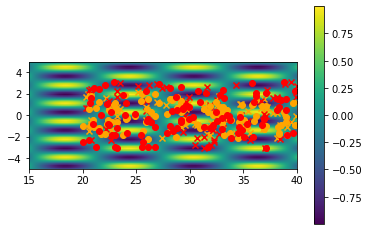

epoch 10 loss 1.3219607074728659


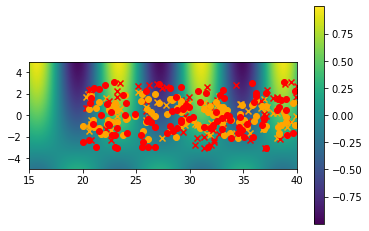

epoch 20 loss 1.2915339615230979


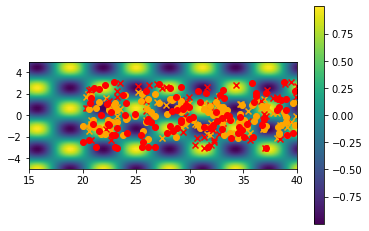

epoch 30 loss 1.2003643096603864


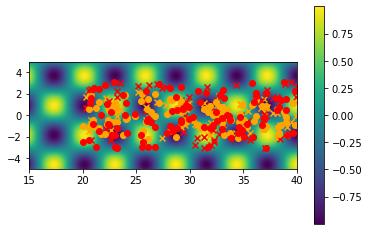

epoch 40 loss 1.1829831372565454


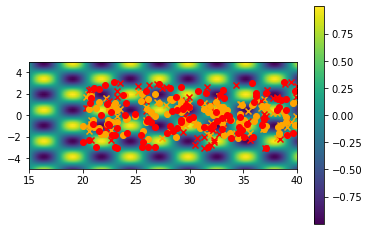

epoch 50 loss 1.2921806742206534


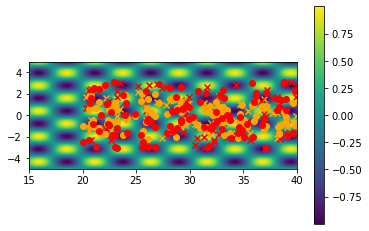

In [14]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(51):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 10 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)

# References


[1] Data source: https://zenodo.org/record/3543638#.YoUa71TMKMo
 
[2] Tutorial: https://tinyurl.com/y6mh4bq8